In [16]:
# import python libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# read the dataset

df = pd.read_csv("heart(1).xls")
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [18]:
# shape of the dataset

df.shape

(1025, 14)

In [19]:
# dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [20]:
# summary
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [21]:
# columns in the data
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

## Checking and Handling missing values

In [22]:
# checking for missing values

df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [23]:
# to get the unique values
df['age'].nunique()

df['age'].unique()


array([52, 53, 70, 61, 62, 58, 55, 46, 54, 71, 43, 34, 51, 50, 60, 67, 45,
       63, 42, 44, 56, 57, 59, 64, 65, 41, 66, 38, 49, 48, 29, 37, 47, 68,
       76, 40, 39, 77, 69, 35, 74], dtype=int64)

In [24]:
# summarizing age column
df['age'].describe()

count    1025.000000
mean       54.434146
std         9.072290
min        29.000000
25%        48.000000
50%        56.000000
75%        61.000000
max        77.000000
Name: age, dtype: float64

In [25]:
# age column exploration
twenty_fifth = df['age'].quantile(0.25)
median = df['age'].quantile(0.5)
seventy_fifth = df['age'].quantile(0.75)
maximum = df['age'].max()
minimum = df['age'].min()


labels = ['teenager', 'young_adult', 'middle_age', 'matured_adult', 'elder']
bins = [0, minimum, twenty_fifth, median, seventy_fifth, maximum]
df['age_cat'] = pd.cut(df['age'], labels=labels, bins=bins)
df[['age', 'age_cat']]

,age,age_cat
0,52,middle_age
1,53,middle_age
2,70,elder
3,61,matured_adult
4,62,elder
...,...,...
1020,59,matured_adult
1021,60,matured_adult
1022,47,young_adult
1023,50,middle_age


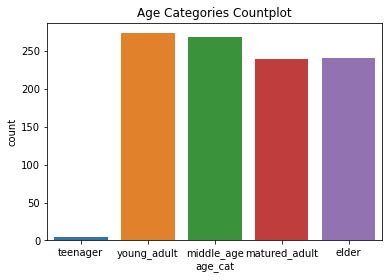

In [26]:
# visualization of the age_cat column

sns.countplot(x='age_cat', data=df)
plt.title('Age Categories Countplot')
plt.show()

## Exploratory Data Analysis

In [27]:
# to create a categorical column for sex and angina by exercise

df['sex_cat'] = np.where(df['sex']==1, 'Male', 'Female')
df['exang_cat'] = np.where(df['exang']==1, 'yes', 'no')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_cat,sex_cat,exang_cat
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,middle_age,Male,no
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,middle_age,Male,yes
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,elder,Male,yes
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,matured_adult,Male,no
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,elder,Female,no


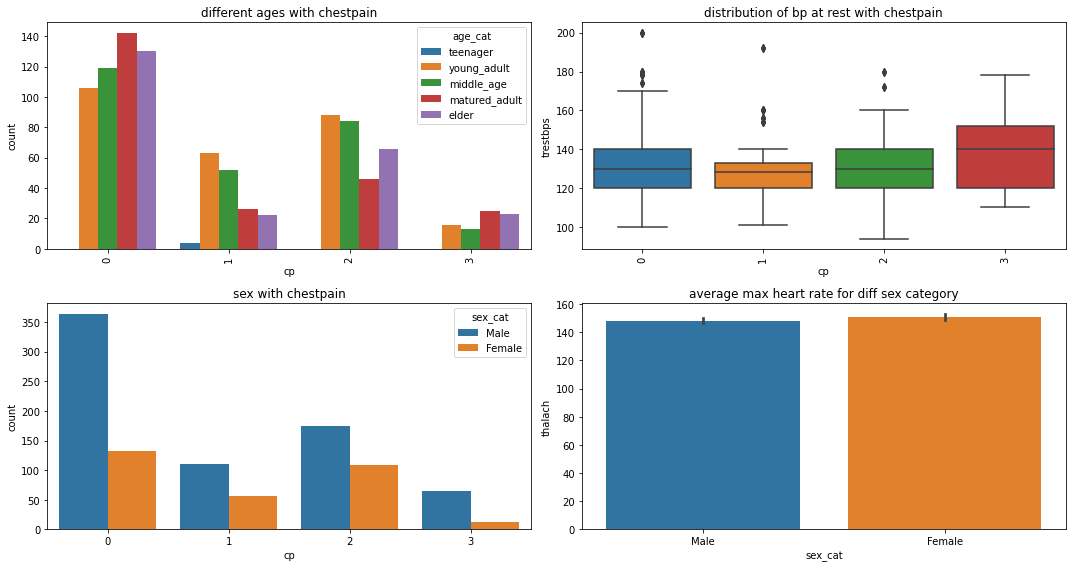

In [31]:
# exploring the categorical columns
fig, axs = plt.subplots(nrows=2, ncols=2, sharey=False, figsize=(15,8))
fig.subplots_adjust(hspace=1.0)

a = sns.countplot(x='cp', hue='age_cat', data=df, ax=axs[0,0])
a.set_title('different ages with chestpain')
axs[0,0].set_xticklabels(axs[0,0].get_xticklabels(), rotation=90)

a = sns.boxplot(x='cp', y='trestbps', data=df, ax=axs[0,1])
a.set_title('distribution of bp at rest with chestpain')
axs[0,1].set_xticklabels(axs[0,0].get_xticklabels(), rotation=90)

a = sns.countplot(x='cp', hue='sex_cat', data=df, ax=axs[1,0])
a.set_title('sex with chestpain')

a = sns.barplot( y='thalach', x='sex_cat', data=df, ax=axs[1,1])
a.set_title('average max heart rate for diff sex category')
fig.tight_layout()
plt.show()

In [39]:
age_cat_count = df[['sex_cat', 'age_cat']].value_counts(normalize=True)
age_cat_count 

sex_cat  age_cat      
Male     young_adult      0.198049
         middle_age       0.184390
         matured_adult    0.177561
         elder            0.131707
Female   elder            0.103415
         middle_age       0.077073
         young_adult      0.068293
         matured_adult    0.055610
Male     teenager         0.003902
dtype: float64

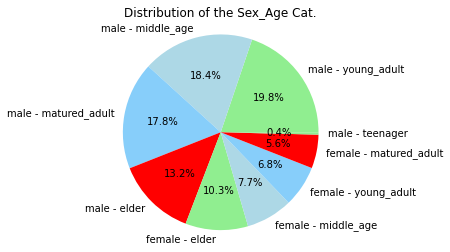

In [42]:
# creating a pie chart
sex_age = {
    ('male', 'young_adult'): 0.198049,
    ('male', 'middle_age'): 0.184390,
    ('male', 'matured_adult'): 0.177561,
    ('male', 'elder'): 0.131707,
    ('female', 'elder'): 0.103415,
    ('female', 'middle_age'): 0.077073,
    ('female', 'young_adult'): 0.068293,
    ('female', 'matured_adult'): 0.055610,
     ('male', 'teenager'): 0.003902,
}

# create a figure and axis
fig, ax = plt.subplots()

# data for the pie chart
labels = [f"{sex} - {age}" for sex, age in sex_age.keys()]
sizes = list(sex_age.values())

# colors for the chart
colors = ['lightgreen', 'lightblue', 'lightskyblue', 'red']

# plot the pie chart
ax.pie(sizes, labels=labels, colors=colors, autopct= '%1.1f%%')

# aspect ratio to make the circular pie
ax.axis('equal')

# title
plt.title('Distribution of the Sex_Age Cat.')
plt.show()

In [43]:
# describe the categorical columns
df.describe(exclude=[np.number])

,age_cat,sex_cat,exang_cat
count,1025,1025,1025
unique,5,2,2
top,young_adult,Male,no
freq,273,713,680


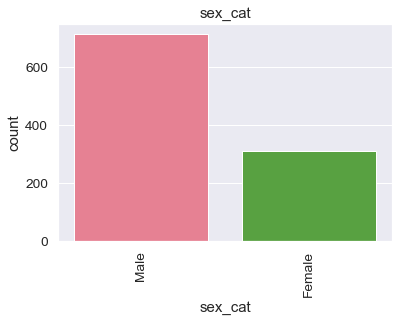

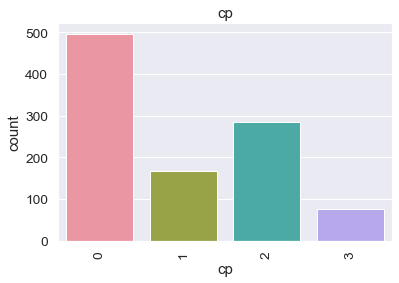

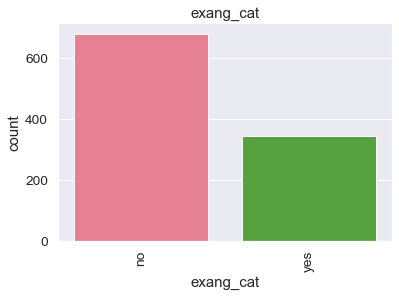

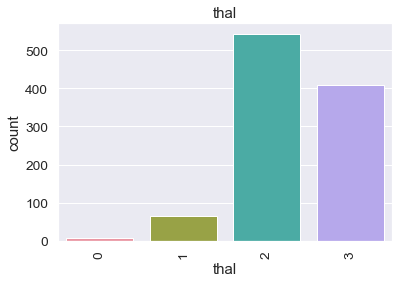

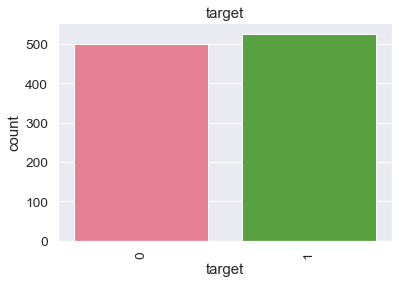

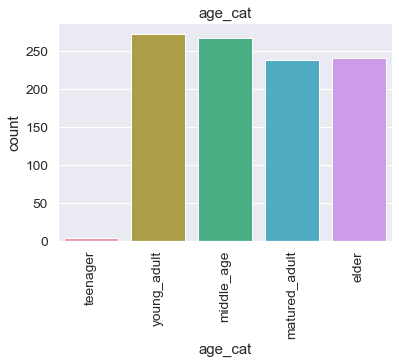

In [44]:
columns = ['sex_cat', 'cp', 'exang_cat', 'thal', 'target', 'age_cat']
sns.set(style='darkgrid', font_scale=1.25)
sns.set_palette('husl',3)

def plot_cat_count():
    for c in columns:
        sns.countplot(x=c, data=df)
        plt.title(c)
        plt.xticks(rotation=90)
        plt.show()
        
plot_cat_count()

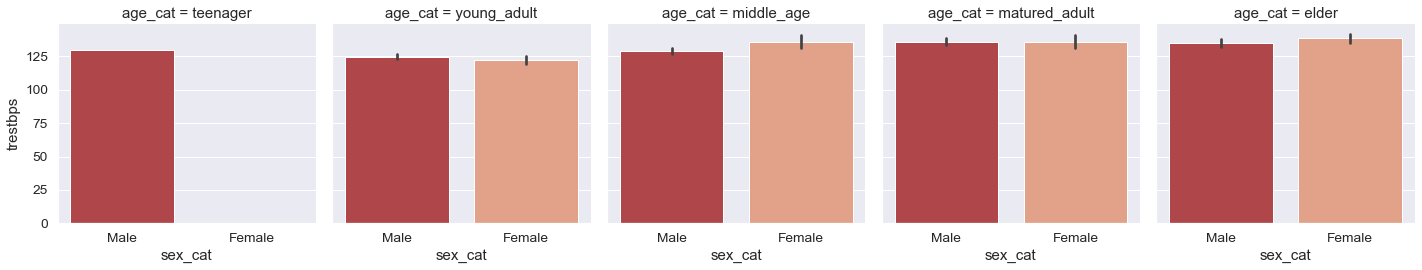

In [52]:
# visualizing the blood pressure at rest by sex for the different ages
sns.set_palette('RdBu')
g = sns.catplot(x='sex_cat', y='trestbps', data=df, kind='bar', col='age_cat', height=4, aspect=1)

# g.fig.suptitle('Average Blood Pressure aT Rest by Sex_cat')
plt.show()

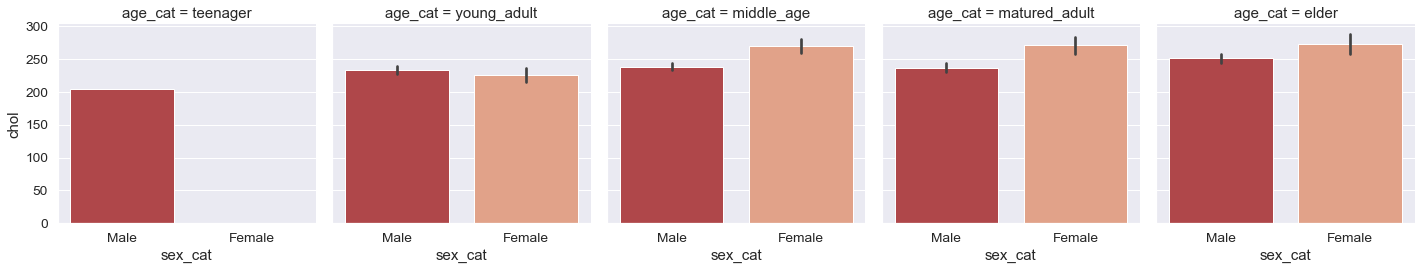

In [53]:
# visualizing cholestrol by sex for the different ages
sns.set_palette('RdBu')
g = sns.catplot(x='sex_cat', y='chol', data=df, kind='bar', col='age_cat', height=4, aspect=1)

# g.fig.suptitle('Average Blood Pressure aT Rest by Sex_cat')
plt.show()

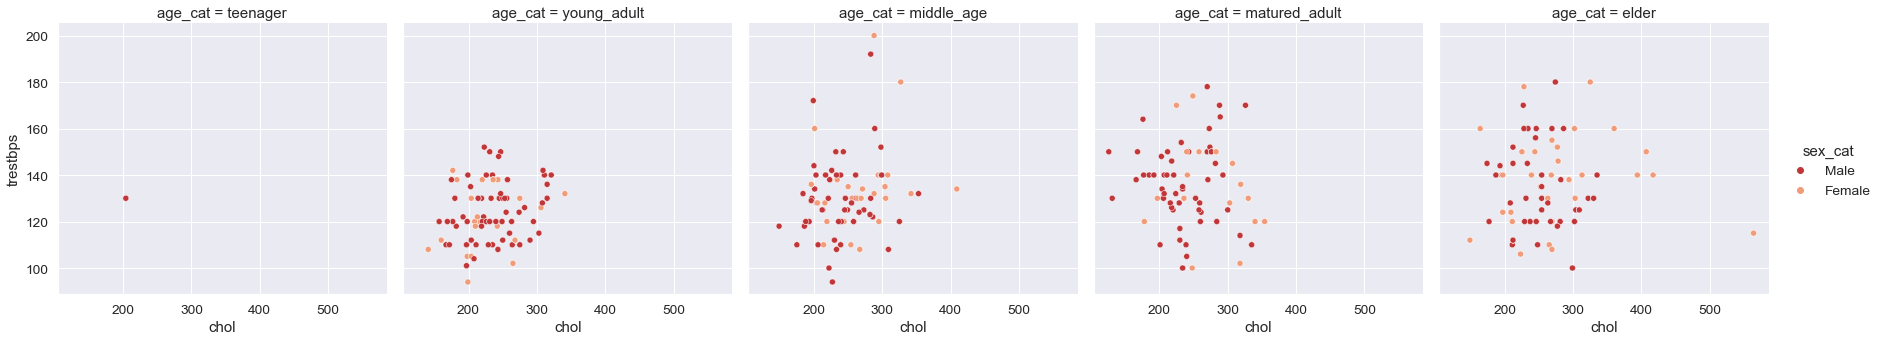

In [55]:
# visualizing the blood pressure at rest by chol for the different ages

sns.set_style('darkgrid')
g = sns.relplot(x='chol', y='trestbps', data=df, hue='sex_cat', col='age_cat')

# g.fig.suptitle('Average Blood Pressure aT Rest by Sex_cat')
plt.show()

# checking the numerical variables in the dataset

In [56]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


C:\Users\HP-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


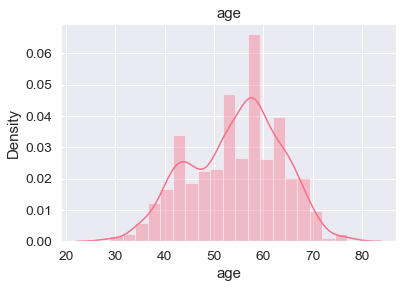

C:\Users\HP-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


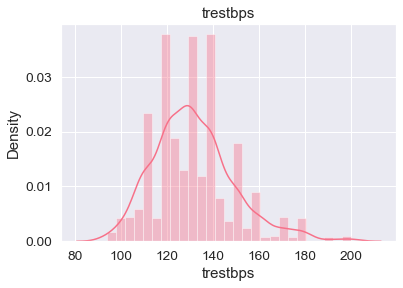

C:\Users\HP-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


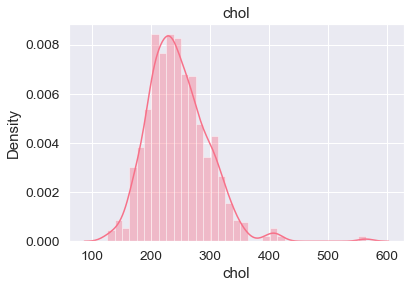

C:\Users\HP-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


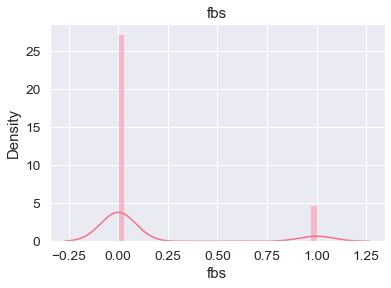

C:\Users\HP-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


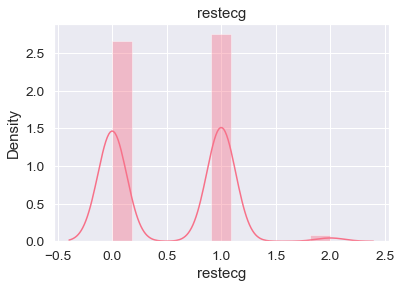

C:\Users\HP-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


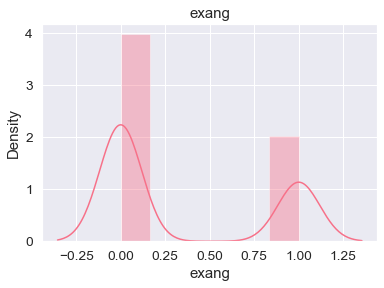

C:\Users\HP-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


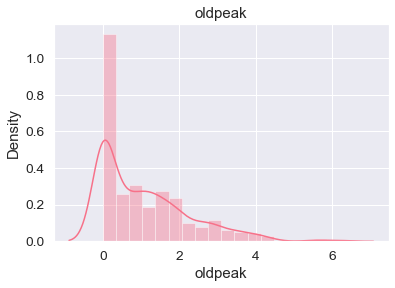

C:\Users\HP-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


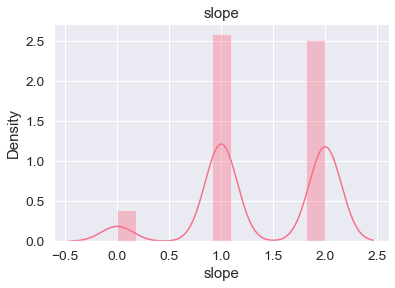

C:\Users\HP-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


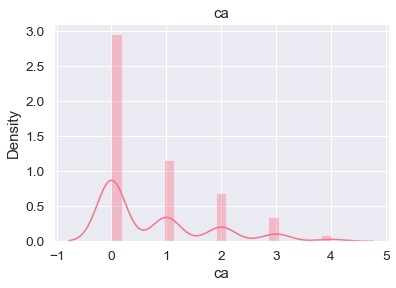

In [58]:
# visualize the above information
columns = ['age', 'trestbps', 'chol', 'fbs', 'restecg', 'exang', 'oldpeak', 'slope', 'ca']

sns.set(style='darkgrid', font_scale=1.25)
sns.set_palette('husl',3)

def plot_dist_count():
    for c in columns:
        sns.distplot(df[c], kde=True)
        plt.title(c)
        plt.show()
        
plot_dist_count()